# Imports

In [108]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Load Data

In [167]:
data = pd.read_csv('cleaned_dataset.csv')

# Feature Selection

In [168]:
# TODO: Category ?
features = ['Rating', 'Installs']
X = data[features]
X.head()

,Rating,Installs
0,4.090909,10000.0
1,4.000000,1000.0
2,3.866667,10000.0
3,4.000000,5000.0
4,4.023256,50000.0


In [169]:
# X = pd.get_dummies(X, columns=['Category'])
# X.head()

In [170]:
# Replace 'Varies' and other non-numeric values with NaN
# X['Minimum Android'] = pd.to_numeric(X['Minimum Android'], errors='coerce')

# Optionally, fill NaN values with the mean or a specific value
# df['Minimum Android'].fillna(df['Minimum Android'].mean(), inplace=True)
# X['Minimum Android'].fillna(0)

# Scaling
Standardize the data to ensure all features contribute equally to the distance calculations.

In [171]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for convenience
scaled_features_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_features_df.head()

,Rating,Installs
0,0.512928,-0.071571
1,0.462432,-0.072665
2,0.388373,-0.071571
3,0.462432,-0.072178
4,0.475350,-0.066707


In [172]:
# Determine the optimal number of clusters using the Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

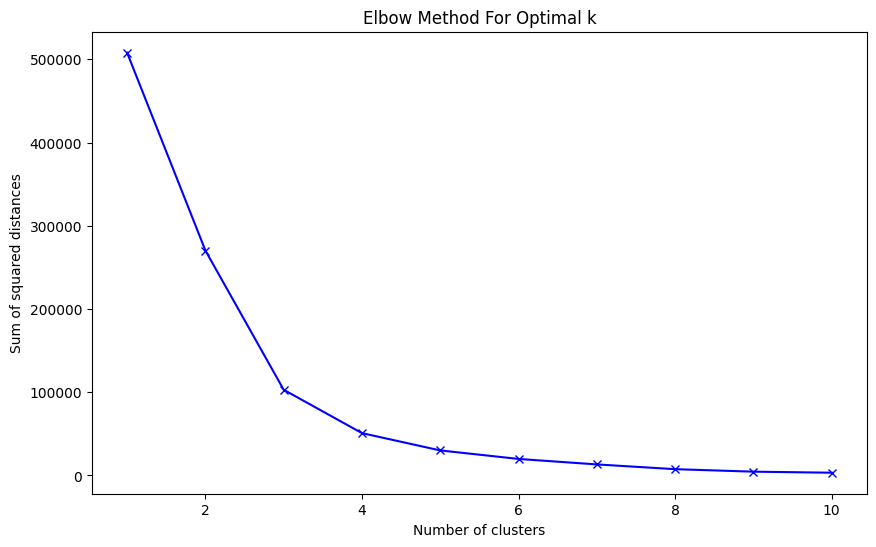

In [173]:
# Plot the Elbow method result
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [174]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
data['KMeans_Cluster'] = kmeans.labels_
y_kmeans = kmeans.fit_predict(X_scaled)

data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version,KMeans_Cluster
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,10000.0,10000.0,True,0.0,USD,...,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.5,0
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,1000.0,1000.0,True,0.0,USD,...,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.2.3,0
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,10000.0,10000.0,True,0.0,USD,...,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.5,0
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,5000.0,5000.0,True,0.0,USD,...,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.4,0
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,50000.0,50000.0,True,0.0,USD,...,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656450e+18,1.1.6,0


# Plot

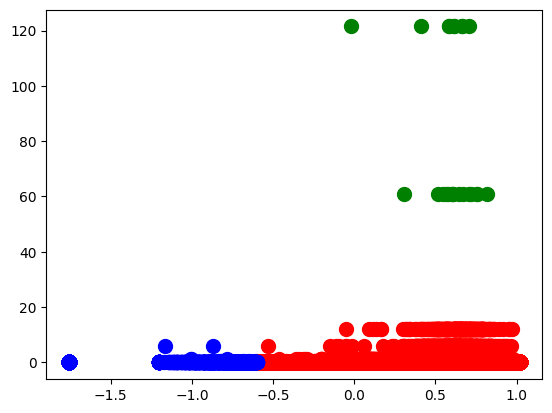

In [175]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
# plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='orange', label='Cluster 4')

In [ ]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of apps')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()